In [79]:
import numpy as np
import pandas as pd


In [80]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [81]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df.shape

(10000, 14)

In [83]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [85]:
df.duplicated().sum()

0

In [86]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [87]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [88]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [89]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [90]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [92]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [93]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
X_train.shape

(8000, 10)

In [96]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [98]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


print(X_train_scaled)
print(X_test_scaled)


[[-0.46460796  0.16958176  0.          0.          1.        ]
 [ 0.30102557 -2.30455945  0.          1.          0.        ]
 [-0.94312892 -1.19119591  1.          0.          0.        ]
 ...
 [-0.36890377  0.9015152   1.          0.          0.        ]
 [-0.08179119 -0.62420521  0.          0.          1.        ]
 [ 0.87525072 -0.28401079  0.          1.          0.        ]]
[[-0.36890377 -0.55204276  0.          1.          0.        ]
 [ 0.10961719 -1.31490297  1.          0.          0.        ]
 [ 0.30102557  0.57162971  0.          0.          1.        ]
 ...
 [-0.27319958 -0.74791227  0.          0.          1.        ]
 [-0.46460796 -0.00566991  0.          1.          0.        ]
 [-0.84742473 -0.79945688  0.          1.          0.        ]]


In [99]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [107]:
model = Sequential()
model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                60        
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [111]:
history = model.fit(X_train_scaled, y_train, batch_size=50, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
128/128 [==============================] - 2s 5ms/step - loss: 0.5983 - accuracy: 0.6811 - val_loss: 0.4725 - val_accuracy: 0.7969
Epoch 2/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7958 - val_loss: 0.4492 - val_accuracy: 0.7969
Epoch 3/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7958 - val_loss: 0.4448 - val_accuracy: 0.7969
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7958 - val_loss: 0.4424 - val_accuracy: 0.7969
Epoch 5/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7958 - val_loss: 0.4412 - val_accuracy: 0.7969
Epoch 6/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7958 - val_loss: 0.4401 - val_accuracy: 0.7969
Epoch 7/10
128/128 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7958 - val_loss: 0.4390 - val_accuracy: 0.7969
Epoch 

In [113]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

63/63 [==============================] - 0s 2ms/step
[[0.22068982]
 [0.17599335]
 [0.22328861]
 ...
 [0.13072936]
 [0.20455904]
 [0.14704911]]


In [114]:
y_pred = y_pred.argmax(axis=-1)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

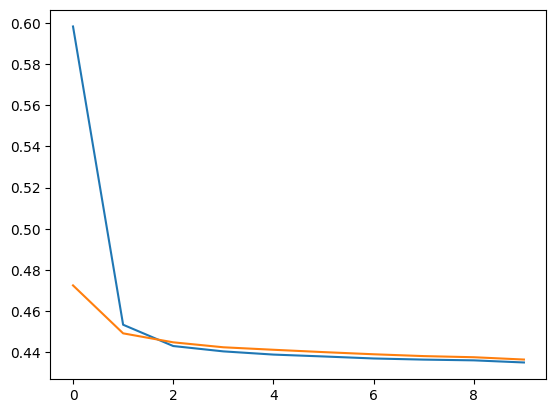

In [116]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

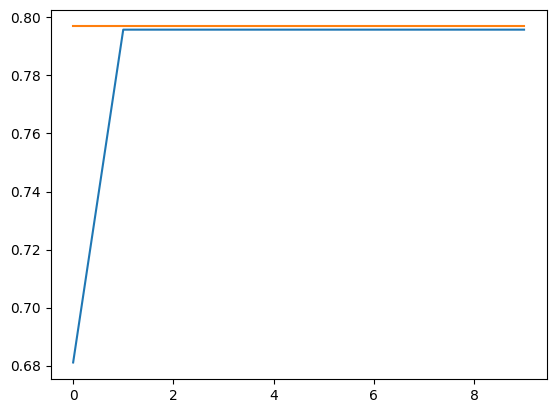

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])